In [35]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
from sklearn.preprocessing import StandardScaler

# finally evaluate model on the test set here
# ...

# save the trained network
#torch.save(net.state_dict(), 'trained-net.pt')

class Net(torch.nn.Module):
    def __init__(self, input, n_HiddenLayers):
        super(Net, self).__init__()
        all_layers = []

        for i in range(n_HiddenLayers-1):
             if(i==0):
              all_layers.append(nn.Linear(input, 256))
              all_layers.append(nn.ReLU())
             else:
              all_layers.append(nn.Linear(256, 256))
              all_layers.append(nn.ReLU())

        all_layers.append(nn.Linear(256, 61))
        if(n_HiddenLayers==1):
          all_layers = []
          all_layers.append(nn.Linear(input, 61))


        self.layers = nn.Sequential(
            *all_layers)


    def forward(self, x):

        return self.layers(x)



def count_parameters(net):
    return sum(p.numel() for p in net.parameters() if p.requires_grad)

def fit(net,train_loader,val_loader):

    training_loss= []
    validation_loss = []




    writer = SummaryWriter()
    optimizer = torch.optim.Adam(net.parameters())
    # train the network
    num_epochs = 20
    criterion =  nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)


            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # accumulate the training loss
            train_loss += loss.item()


        # calculate the validation loss
        net.eval()
        with torch.no_grad():
            val_loss = 0.0
            for inputs, labels in val_loader:
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        # print the epoch loss
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        training_loss.append(train_loss)
        validation_loss.append(val_loss)

        print(f'Epoch {epoch}: train_loss={train_loss}, val_loss={val_loss}')
        writer.add_scalars('loss',{'train':train_loss,'val':val_loss},epoch)

    return training_loss, validation_loss


def procesData(x_T, y_T, x_V, y_V, x_test, y_test):
  batch_size = 256

  x_T = x_T.astype('float32')
  x_V = x_V.astype('float32')
  x_test =  x_test.astype('float32')

  Normalizer = StandardScaler()
  x_T = Normalizer.fit_transform(x_T)
  x_V = Normalizer.transform(x_V)
  x_test = Normalizer.transform(x_test)

  train_x = torch.FloatTensor(x_T)
  train_y = torch.LongTensor(y_T)
  

  val_x = torch.FloatTensor(x_V)
  val_y= torch.LongTensor(y_V)
  
  test_x =  torch.FloatTensor(x_test)
  test_y = torch.LongTensor(y_test)

  train_dataset = torch.utils.data.TensorDataset(train_x , train_y)
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
  val_dataset = torch.utils.data.TensorDataset(val_x, val_y)
  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

  test_dataset = torch.utils.data.TensorDataset(test_x , test_y)
  test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size)

  return train_loader, val_loader, test_loader

def evaluate(net, testloader):
        net.eval()
        all_output = []
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = net(inputs)
                all_output.append(outputs.numpy())
                
                 

        return np.vstack(all_output)
      
def MakePlots(T_loss , V_loss, Tittle):
 plt.plot(np.arange(1,len(T_loss)+1,1), T_loss, label="Training loss", color="green")
 plt.plot(np.arange(1,len(V_loss)+1,1), V_loss, label="Validation losss",color="red")
 plt.title(Tittle)
 plt.xlabel("Epochs")
 plt.ylabel("loss")
 plt.legend()
 plt.show()

In [36]:
#Have to be changed
AllTrainData = np.load('C://Users//cmp23//Skrivbord//DT2119-Speech-and-Speaker-Recognition_labs//cleantraindata.npz')
allValidationData = np.load('C://Users//cmp23//Skrivbord//DT2119-Speech-and-Speaker-Recognition_labs//cleanValidation.npz')
allTestdata = np.load('C://Users//cmp23//Skrivbord//DT2119-Speech-and-Speaker-Recognition_labs//cleantestdata.npz')

In [37]:
# lmfcc_train_x
lmfcc_train_x = AllTrainData['lmfcc_train_x']
train_y  =AllTrainData['train_y']
lmfcc_val_x = allValidationData['lmfcc_val_x']
val_y = allValidationData['val_y']

lmfcc_test_x = allTestdata['mfcc_test_x']
test_y  =allTestdata['test_y']
print(test_y.shape)

train_loader, val_loader, testloader = procesData(lmfcc_train_x, train_y, lmfcc_val_x,val_y, lmfcc_test_x, test_y)

(1527014,)


Epoch 0: train_loss=1.476588348536316, val_loss=1.981110184270192
Epoch 1: train_loss=1.3494133573953608, val_loss=1.8726262025716829
Epoch 2: train_loss=1.3217958274848722, val_loss=1.822947257805646
Epoch 3: train_loss=1.3068754743978206, val_loss=1.7897631315681024
Epoch 4: train_loss=1.2965623391004597, val_loss=1.7680976604058491
Epoch 5: train_loss=1.2887480018556592, val_loss=1.7545127409260448
Epoch 6: train_loss=1.2827599753721401, val_loss=1.7446683478549243
Epoch 7: train_loss=1.2778647667221559, val_loss=1.7346869853453908
Epoch 8: train_loss=1.2736873050440338, val_loss=1.7293366364347256
Epoch 9: train_loss=1.2703120715246536, val_loss=1.7246161211796893
Epoch 10: train_loss=1.2672237289824357, val_loss=1.721179338587009
Epoch 11: train_loss=1.2646472063035643, val_loss=1.7196243374328304
Epoch 12: train_loss=1.2624569360419662, val_loss=1.7165598243232665
Epoch 13: train_loss=1.2603889616615265, val_loss=1.7120872735007993
Epoch 14: train_loss=1.258539812658427, val_loss

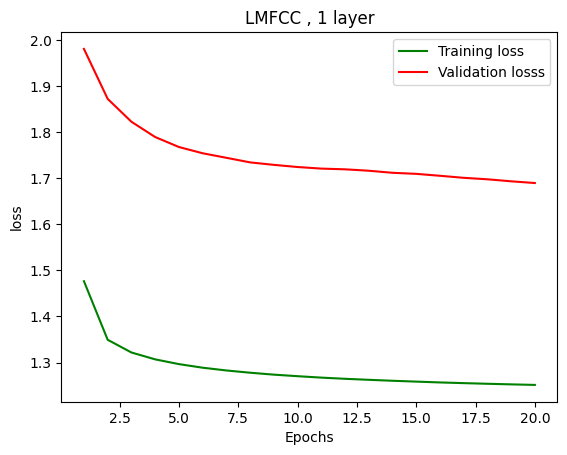

In [38]:
net = Net(13,2)
T_loss , V_loss = fit(net,train_loader,val_loader)
MakePlots(T_loss , V_loss, "LMFCC , 1 layer")



In [39]:
pred = evaluate(net,testloader)

In [40]:
#Accuracy according to 5.1.1 
result = np.argmax(pred, axis=1)
c =0

for i in range(len(result)):
   
   if result[i]==test_y[i]:
      c +=1

print(c/len(result))

0.5126901259582427


In [47]:
#Accuracy according to 5.1.2
from lab3_tools import *
from lab3_proto import *

from lab1_tools import *
from lab1_proto import *

from lab2_tools import *
from lab2_proto import *
 
phoneHMMs = np.load('lab2_models_all.npz',allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]

correct = np.zeros(len(phones) , dtype=int)
total = np.zeros(len(phones), dtype=int)

for i in range(len(result)):
   index = test_y[i]
   word = stateList[index][:-2]
   finalindex = phones.index(word)
   total[finalindex] +=1 

   if result[i]==test_y[i]:
      correct[finalindex] +=1 

accuracy = (correct/total) * 100
np.set_printoptions(suppress=True)

for i in range(len(phones)): 
 print("Phones: " + phones[i] + ",   Accuracy: " + str(np.round(accuracy[i],2)))
 #print(np.round(accuracy,2))


Phones: ah,   Accuracy: 30.21
Phones: ao,   Accuracy: 63.73
Phones: ay,   Accuracy: 56.46
Phones: eh,   Accuracy: 13.87
Phones: ey,   Accuracy: 24.87
Phones: f,   Accuracy: 50.68
Phones: ih,   Accuracy: 17.87
Phones: iy,   Accuracy: 51.76
Phones: k,   Accuracy: 35.84
Phones: n,   Accuracy: 43.41
Phones: ow,   Accuracy: 48.2
Phones: r,   Accuracy: 53.56
Phones: s,   Accuracy: 59.16
Phones: sil,   Accuracy: 72.26
Phones: sp,   Accuracy: 0.13
Phones: t,   Accuracy: 33.51
Phones: th,   Accuracy: 32.81
Phones: uw,   Accuracy: 37.38
Phones: v,   Accuracy: 28.91
Phones: w,   Accuracy: 47.41
Phones: z,   Accuracy: 48.91
